# Day 5: Introduction to Statistics

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel("dataset/data loan.xlsx")

In [3]:
#get dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 23 columns):
Kontrak                  28293 non-null int64
Tipe_Kendaraan           28293 non-null object
Pekerjaan                28293 non-null object
Area                     28293 non-null object
Tenor                    28293 non-null int64
Bucket_Collectability    28293 non-null object
NPF                      28293 non-null object
Total_AR                 28293 non-null float64
LTV                      28293 non-null float64
OTR                      28293 non-null float64
Age                      28293 non-null int64
Interest_Rate            28293 non-null float64
Income                   28293 non-null int64
DP                       28293 non-null float64
AF                       28293 non-null float64
Tujuan                   28293 non-null object
Pendidikan               28293 non-null object
Tanggungan               28293 non-null object
Status                   28293 non-null obj

## Transforming the Data

In [4]:
import copy

In [5]:
df_edit = copy.deepcopy(df)

In [6]:
df_edit.Tipe_Kendaraan.value_counts()

MINIBUS            14440
LCGC                6078
OTHERS              5657
TRUCK & PICK UP     2118
Name: Tipe_Kendaraan, dtype: int64

In [7]:
df_edit['Tipe_Kendaraan'] = df_edit.Tipe_Kendaraan.map({'MINIBUS': 'MINIBUS', 
     'LCGC': "NONMINIBUS", 
     "OTHERS": "NONMINIBUS", 
     "TRUCK & PICK UP": "NONMINIBUS"})

In [8]:
df_edit.Tipe_Kendaraan.value_counts().index

Index(['MINIBUS', 'NONMINIBUS'], dtype='object')

### Transforming Area: DUMMY

dummies variable is like flagging

In [9]:
df_edit['Area'].value_counts()

Jawa        15677
Sumatera     9872
Others       2744
Name: Area, dtype: int64

In [10]:
d_area = pd.get_dummies(df_edit['Area'], prefix = 'Area')

In [11]:
d_area.head()

Area_Jawa  Area_Others  Area_Sumatera
0          1            0              0
1          1            0              0
2          1            0              0
3          1            0              0
4          1            0              0

In [12]:
df_edit = pd.concat([df_edit, d_area], axis=1)

In [13]:
df_edit.head()

Kontrak Tipe_Kendaraan   Pekerjaan  Area  Tenor Bucket_Collectability  \
0        1     NONMINIBUS    Karyawan  Jawa     12        >90 - 120 hari   
1        2     NONMINIBUS  Wiraswasta  Jawa     12           0 - 30 hari   
2        3     NONMINIBUS  Wiraswasta  Jawa     12           0 - 30 hari   
3        4     NONMINIBUS    Karyawan  Jawa     12           0 - 30 hari   
4        5     NONMINIBUS    Karyawan  Jawa     12           0 - 30 hari   

     NPF  Total_AR     LTV   OTR      ...       Pendidikan  Tanggungan  \
0     Ya  2.763126  100.00  2.76      ...          Sarjana   Tidak ada   
1  Tidak  2.805000  103.70  2.71      ...           Others   Tidak ada   
2  Tidak  3.104000  103.33  3.00      ...          Sarjana   Tidak ada   
3  Tidak  4.088100  102.51  3.98      ...          Sarjana         Ada   
4  Tidak  4.607100  102.22  4.50      ...          Sarjana   Tidak ada   

    Status     Gender  Paket Inflasi              Segmen Area_Jawa  \
0   OTHERS  Laki-laki     Ya    3.58  Jasa & Perdagangan         1   
1  MENIKAH  Laki-laki     Ya    3.58              Others         1   
2   OTHERS  Perempuan     Ya    4.17              Others         1   
3   OTHERS  Laki-laki     Ya    3.61  Jasa & Perdagangan         1   
4   OTHERS  Perempuan     Ya    3.30  Jasa & Perdagangan         1   

  Area_Others Area_Sumatera  
0           0             0  
1           0             0  
2           0             0  
3           0             0  
4           0             0  

[5 rows x 26 columns]

### Merubah nilai dengan numpy.where()

### Diskritisasi LTV

In [14]:
diskret_LTV = pd.cut(df_edit.LTV,5)

In [15]:
diskret_LTV.head()

0    (90.486, 111.83]
1    (90.486, 111.83]
2    (90.486, 111.83]
3    (90.486, 111.83]
4    (90.486, 111.83]
Name: LTV, dtype: category
Categories (5, interval[float64]): [(5.003, 26.454] < (26.454, 47.798] < (47.798, 69.142] < (69.142, 90.486] < (90.486, 111.83]]

In [16]:
df.head()

Kontrak Tipe_Kendaraan   Pekerjaan  Area  Tenor Bucket_Collectability  \
0        1         OTHERS    Karyawan  Jawa     12        >90 - 120 hari   
1        2         OTHERS  Wiraswasta  Jawa     12           0 - 30 hari   
2        3         OTHERS  Wiraswasta  Jawa     12           0 - 30 hari   
3        4         OTHERS    Karyawan  Jawa     12           0 - 30 hari   
4        5         OTHERS    Karyawan  Jawa     12           0 - 30 hari   

     NPF  Total_AR     LTV   OTR         ...           DP    AF   Tujuan  \
0     Ya  2.763126  100.00  2.76         ...          0.0  2.76  Private   
1  Tidak  2.805000  103.70  2.71         ...          0.0  2.81  Private   
2  Tidak  3.104000  103.33  3.00         ...          0.0  3.10  Private   
3  Tidak  4.088100  102.51  3.98         ...          0.0  4.08  Private   
4  Tidak  4.607100  102.22  4.50         ...          0.0  4.60  Private   

   Pendidikan  Tanggungan   Status     Gender Paket Inflasi  \
0     Sarjana   Tidak ada   OTHERS  Laki-laki    Ya    3.58   
1      Others   Tidak ada  MENIKAH  Laki-laki    Ya    3.58   
2     Sarjana   Tidak ada   OTHERS  Perempuan    Ya    4.17   
3     Sarjana         Ada   OTHERS  Laki-laki    Ya    3.61   
4     Sarjana   Tidak ada   OTHERS  Perempuan    Ya    3.30   

               Segmen  
0  Jasa & Perdagangan  
1              Others  
2              Others  
3  Jasa & Perdagangan  
4  Jasa & Perdagangan  

[5 rows x 23 columns]

### Transforming Income: Standarisasi

In [17]:
df_edit.describe().Income

count    28293.000000
mean        20.449334
std        115.608090
min          1.000000
25%          9.000000
50%         15.000000
75%         20.000000
max      10000.000000
Name: Income, dtype: float64

In [18]:
standardize_income =(df_edit['Income'] - df_edit['Income'].mean())/df_edit['Income'].std()

In [19]:
standardize_income.head()

0   -0.090386
1   -0.047136
2   -0.003887
3   -0.047136
4   -0.003887
Name: Income, dtype: float64

In [20]:
df_edit.Income.head()

0    10
1    15
2    20
3    15
4    20
Name: Income, dtype: int64

In [21]:
df_edit.Income.std()

115.60808970422566

In [22]:
from matplotlib import pyplot as plt

### Normalization Income

**Change**
<br>From: 1000 - 1000000 
<br>To: 0 - 1

In [23]:
normalized_income = (df_edit['Income'] - df_edit['Income'].min())/(df_edit['Income'].max() - df_edit['Income'].min())
normalized_income.head()

0    0.0009
1    0.0014
2    0.0019
3    0.0014
4    0.0019
Name: Income, dtype: float64

In [24]:
normalized_income.describe()

count    28293.000000
mean         0.001945
std          0.011562
min          0.000000
25%          0.000800
50%          0.001400
75%          0.001900
max          1.000000
Name: Income, dtype: float64

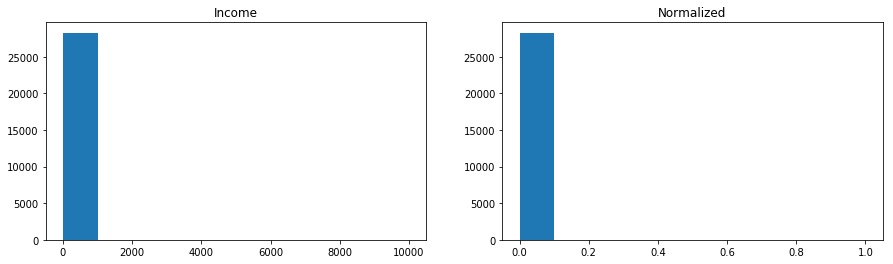

In [25]:
 #visualisasi
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (15,4))
    
ax1.hist(df_edit['Income'])
ax1.set_title('Income')

ax2.hist(normalized_income)
ax2.set_title('Normalized')
    
plt.show()

## Outliers Detections

from Z-Score

In [29]:
test = (abs(standardize_income) > 3)

test.value_counts()

False    28250
True        43
Name: Income, dtype: int64

from IQR or from BOXPLOT

In [30]:
Q1_Income = df_edit['Income'].quantile(0.25)
Q3_Income = df_edit['Income'].quantile(0.75)
IQR = Q3_Income - Q1_Income

In [31]:
len(df_edit[(df_edit.Income < (Q1_Income - 1.5*IQR)) | (df_edit.Income > (Q3_Income + 1.5*IQR))])

2066

In [43]:
from scipy.stats import ttest_ind

In [44]:
x1 = df_edit['Income'][df_edit['NPF'] == 'Ya']
x2 = df_edit['Income'][df_edit['NPF'] != 'Ya']

In [45]:
#menguji rata2 x1 dengan x2
#True -> variance dari x1 & x2 sama
#False -> variance dari x1 & x2 beda
# ttest_ind -> pValue
ttest_ind(x1,x2, equal_var = True)

Ttest_indResult(statistic=1.1605323548958912, pvalue=0.2458419213508887)

### Interpretasi

karena pvalue > 0,05 maka H0 gagal ditolak, sehingga 

### Regresi linear sederhana

In [71]:
from sklearn.model_selection import traing_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics;

ImportError: cannot import name 'traing_test_split'

In [72]:
# input dataset
x = df_edit['Income']
y = df_edit['Total_AR']

In [73]:
import pandas
print(pandas.__version__)

# change data structure
# x = x.to_numpy().reshape(-1,1)
# y = y.to_numpy().reshape(-1,1)

0.20.3


### Pemodelan dengan statmodels

In [77]:
mc = pd.read_excel(r"dataset\data microchip.xlsx")
mc

year  year_since_1959  number_of_component
0  1959                0                    1
1  1962                3                    7
2  1963                4                   19
3  1964                5                   29
4  1965                6                   64

In [102]:
import statsmodels.formula.api as imf
import statsmodels.api as sm

Regresi pengaruh waktu terhadap  number of component

In [104]:
ols_1_mc = imf.ols('number_of_component ~ year_since_1959 np.log(Pop1831)', data=mc).fit()
# print(ols_1_mc.summary())
print(ols_1_mc.summary2())

SyntaxError: invalid syntax (<unknown>, line 1)